## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_04-10-08-23.csv', firstRow=744, lastRow=750)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_080823_S745-750.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=56s and ended at t=474s; mass=44.79104999999999g
This equals a volume of 44.881m; expected was 45.35mL; error is 1.035%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0015 g/s and for 2nd derivative = 0.0003125 g/s^2


<IPython.core.display.Javascript object>


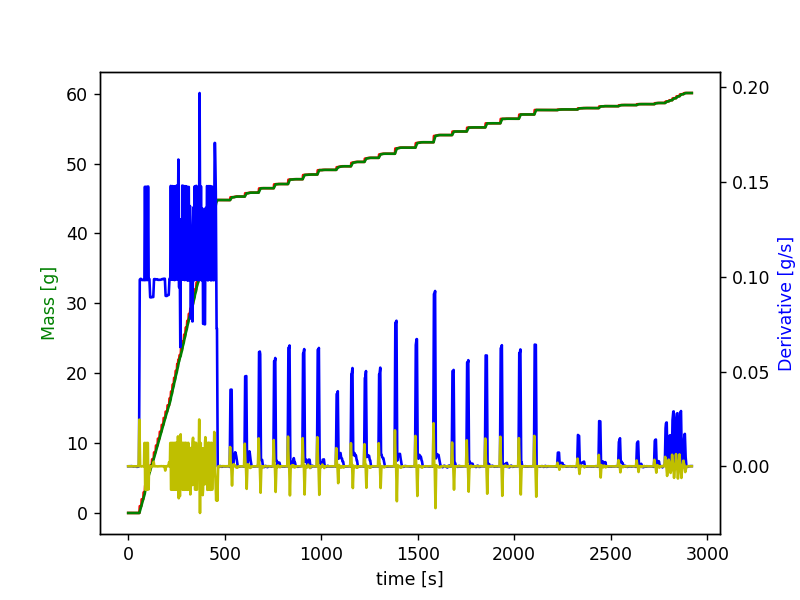

Addition of 0.504g Texapon SB 3 KC detected from 524s to 570s - expected volume = 0.731mL and actual volume = 0.454mL (resulting error is 37.916%)
Addition of 0.561g Texapon SB 3 KC detected from 600s to 642s - expected volume = 0.55mL and actual volume = 0.508mL (resulting error is 7.572%)
Addition of 0.636g Texapon SB 3 KC detected from 672s to 702s - expected volume = 0.55mL and actual volume = 0.576mL (resulting error is 4.774%)
Addition of 0.604g Plantapon ACG 50 detected from 750s to 790s - expected volume = 0.565mL and actual volume = 0.541mL (resulting error is 4.235%)
Addition of 0.692g Plantapon ACG 50 detected from 824s to 870s - expected volume = 0.565mL and actual volume = 0.62mL (resulting error is 9.738%)
Addition of 0.674g Plantapon ACG 50 detected from 900s to 948s - expected volume = 0.558mL and actual volume = 0.602mL (resulting error is 7.933%)
Addition of 0.67g Plantapon ACG 50 detected from 976s to 1022s - expected volume = 0.558mL and actual volume = 0.599mL (res

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.001875 g/s and for 2nd derivative = 0.000390625 g/s^2


<IPython.core.display.Javascript object>


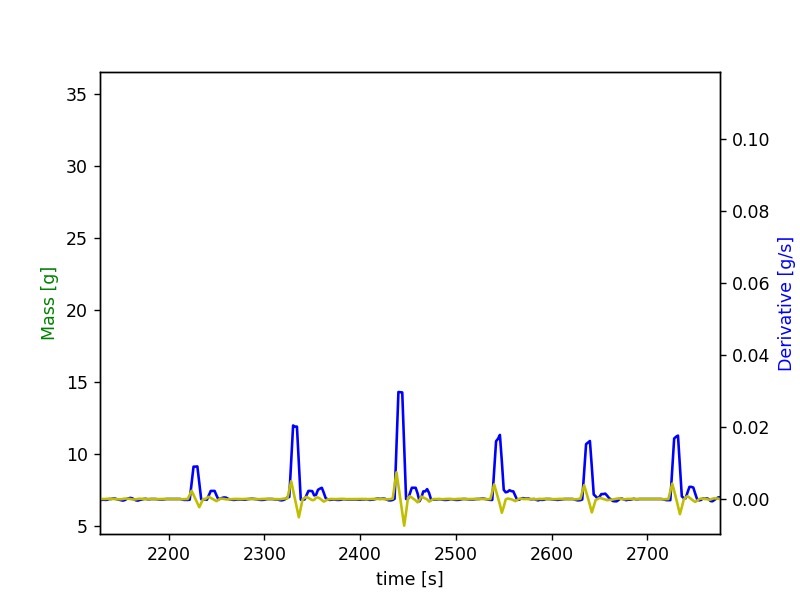

Addition of 0.087g Salcare Super 7 detected from 2220s to 2254s - expected volume = 0.107mL and actual volume = 0.079mL (resulting error is 26.059%)
Addition of 0.204g Salcare Super 7 detected from 2324s to 2368s - expected volume = 0.172mL and actual volume = 0.185mL (resulting error is 7.368%)
Addition of 0.278g Salcare Super 7 detected from 2434s to 2478s - expected volume = 0.253mL and actual volume = 0.255mL (resulting error is 0.725%)
Addition of 0.164g Salcare Super 7 detected from 2536s to 2566s - expected volume = 0.12mL and actual volume = 0.15mL (resulting error is 25.191%)
Addition of 0.13g Salcare Super 7 detected from 2630s to 2648s - expected volume = 0.094mL and actual volume = 0.117mL (resulting error is 24.76%)
Addition of 0.164g Salcare Super 7 detected from 2722s to 2756s - expected volume = 0.132mL and actual volume = 0.149mL (resulting error is 13.19%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2152,2256,2366,2482,2582,2680,2758])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


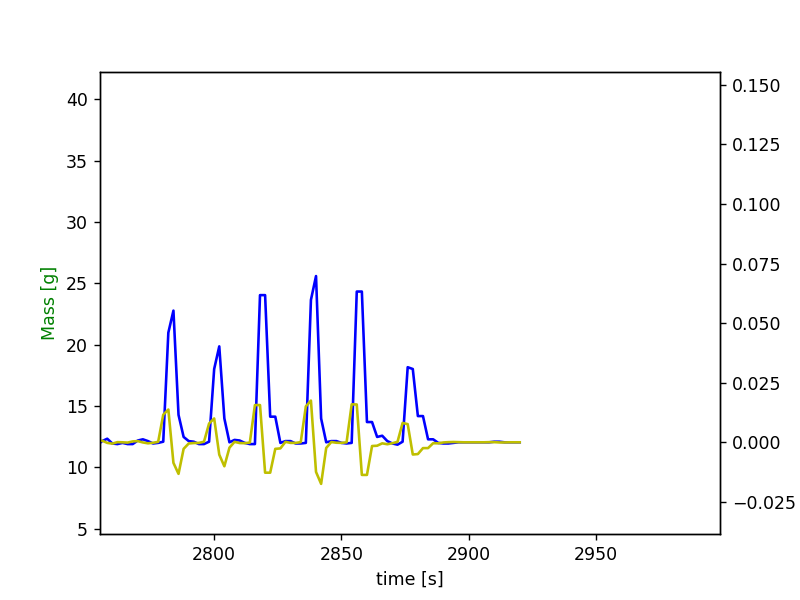

Addition of 0.231g Arlypon TT detected from 2778s to 2792s - expected volume = 0.239mL and actual volume = 0.242mL (resulting error is 1.096%)
Addition of 0.163g Arlypon TT detected from 2796s to 2810s - expected volume = 0.118mL and actual volume = 0.171mL (resulting error is 44.248%)
Addition of 0.288g Arlypon TT detected from 2814s to 2830s - expected volume = 0.283mL and actual volume = 0.305mL (resulting error is 7.865%)
Addition of 0.279g Arlypon TT detected from 2834s to 2848s - expected volume = 0.244mL and actual volume = 0.295mL (resulting error is 20.563%)
Addition of 0.296g Arlypon TT detected from 2852s to 2868s - expected volume = 0.261mL and actual volume = 0.309mL (resulting error is 18.4%)
Addition of 0.171g Arlypon TT detected from 2872s to 2888s - expected volume = 0.122mL and actual volume = 0.179mL (resulting error is 46.983%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2490,2506,2522,2538,2554,2568,2588])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_080823_S745-S750.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_15720\3239712080.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
744,745.0,5.172668,0.000000,11.727111,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.896356,0.0,2.368024
745,746.0,0.000000,0.000000,11.606018,7.642529,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.014831,0.0,1.609889
746,747.0,0.000000,12.631309,0.000000,0.000000,0.0,10.742023,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.710121,0.0,2.807607
747,748.0,0.000000,12.944542,0.000000,9.978245,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.580483,0.0,2.683930
748,749.0,0.000000,0.000000,8.704279,0.000000,0.0,0.000000,0.000000,0.0,0.0,12.462584,0.0,0.0,0.0,0.0,0.0,1.286310,0.0,2.934472
749,750.0,11.668185,0.000000,0.000000,0.000000,0.0,0.000000,12.170755,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.598532,0.0,1.660622
